# Health Insurance EDA for Phase 1 Project ✅

Import Library:

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read Data:

In [65]:
df = pd.read_csv("insurance.csv")

# Data Exploration

Data Cleaning & Processing:

In [5]:
df.info()

#There are 7 columns, and 1338 rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Show the descriptive statistics for the columns in the datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
# Show the descriptive statistics for the columns in the dataset
df.describe(include="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [9]:
# Sort the data by the highest incurred charges to the lowest
df = df.sort_values(by="charges", ascending=False)

In [10]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


In [11]:
# Show all column titles in a list
FEATURES = df.columns.tolist()
FEATURES

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [12]:
# Show the meaning of all the columns
DESCRIPTORS = [
  "The insured person's age.",
  "Gender (male or female) of the insured.",
  "(Body Mass Index): A measure of body fat based on height and weight.",
  "The number of dependents covered.",
  "Whether the insured is a smoker (yes or no).",
  "The geographic area of coverage.",
  "The medical insurance costs incurred by the insured person."
]

In [13]:
# Create a new dataframe called reference that shows each column and its description
reference = pd.DataFrame(
  {
    "Features": FEATURES,
    "Descriptors": DESCRIPTORS
  }
)
reference

,Features,Descriptors
0,age,The insured person's age.
1,sex,Gender (male or female) of the insured.
2,bmi,(Body Mass Index): A measure of body fat based...
3,children,The number of dependents covered.
4,smoker,Whether the insured is a smoker (yes or no).
5,region,The geographic area of coverage.
6,charges,The medical insurance costs incurred by the in...


In [14]:
# Determine if there are any null values in the dataset

df.isna().sum()

# There are no null values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [15]:
df['region'].unique() # Show which regions are represented in the dataset

array(['southeast', 'northwest', 'northeast', 'southwest'], dtype=object)

In [16]:
df["sex"].value_counts() # Show how many males and females are represented in the dataset

,count
sex,
male,676
female,662


In [17]:
df["age"].describe() # Show the descriptive statistics for age in the dataset

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [18]:
region_df = df['region'].value_counts() # Show how many people are represented from each region

region_df

,count
region,
southeast,364
northwest,325
southwest,325
northeast,324


# **Descriptive Analysis Questions 📈:**





1. What is the distribution of age, sex, BMI, children, smoker, region, and charges in the dataset?

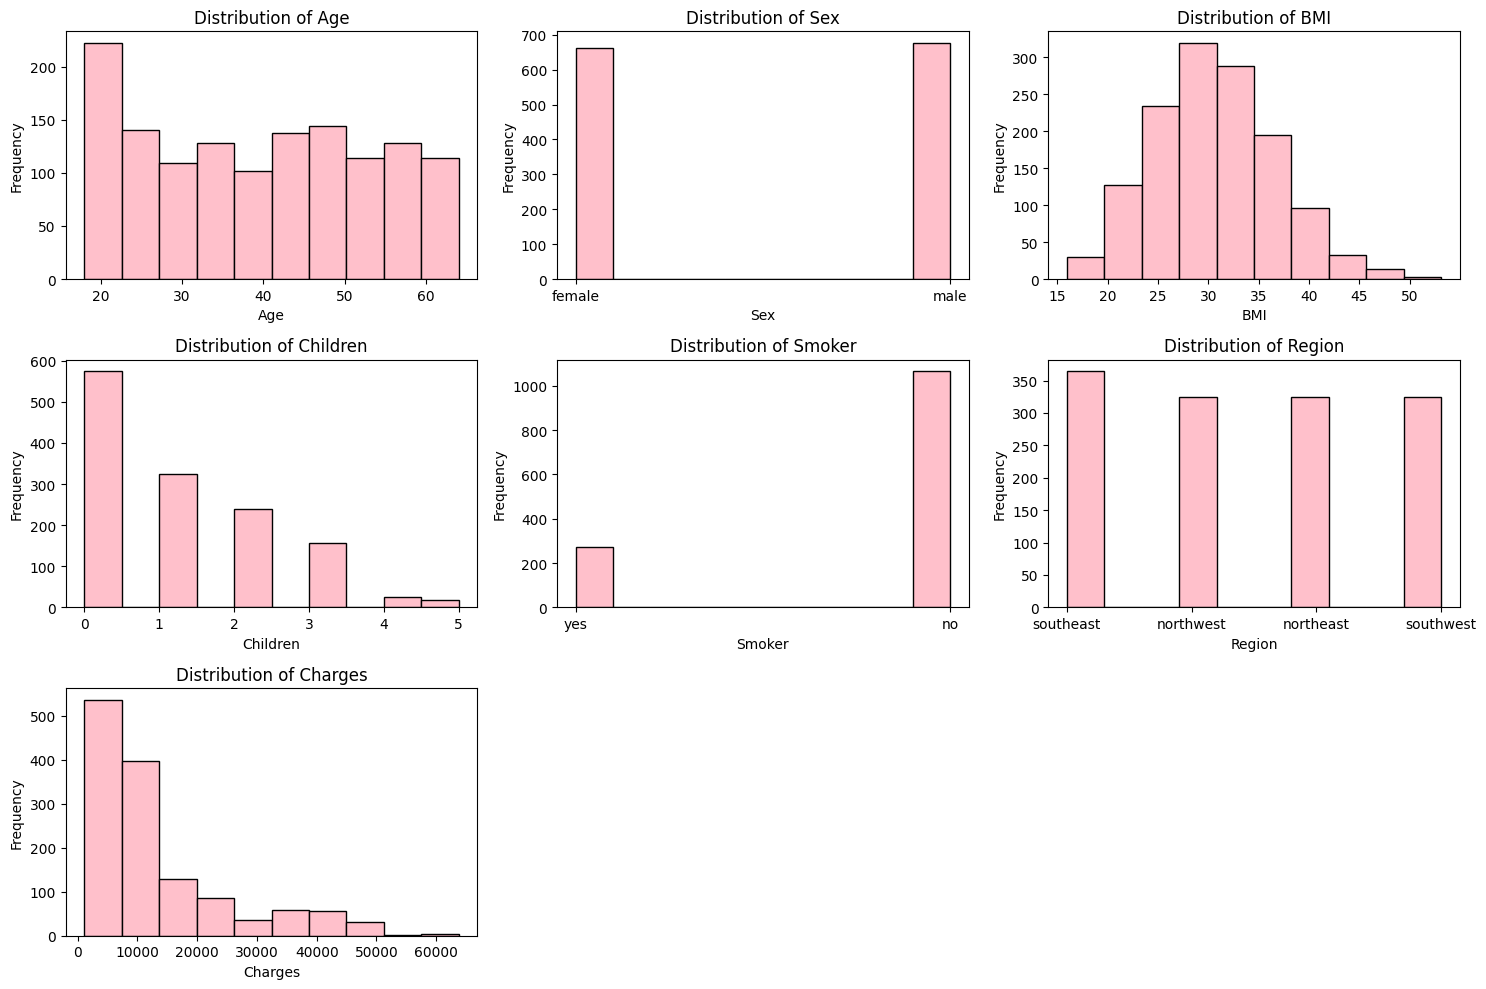

In [37]:
# Create a histogram for each column in the dataset (i.e., age, sex, BMI, children, smoker, region, and charges)?

plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
plt.hist(df.age, color='pink', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(3,3,2)
plt.hist(df.sex, color='pink', edgecolor = 'black')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')

plt.subplot(3,3,3)
plt.hist(df.bmi, color='pink', edgecolor = 'black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

plt.subplot(3,3,4)
plt.hist(df.children, color='pink', edgecolor = 'black')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.title('Distribution of Children')

plt.subplot(3,3,5)
plt.hist(df.smoker, color='pink', edgecolor = 'black')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Distribution of Smoker')

plt.subplot(3,3,6)
plt.hist(df.region, color='pink', edgecolor = 'black')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Distribution of Region')

plt.subplot(3,3,7)
plt.hist(df.charges, color='pink', edgecolor = 'black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

plt.tight_layout()
plt.show()

2. What is the relationship between each of the columns and the charges incurred?

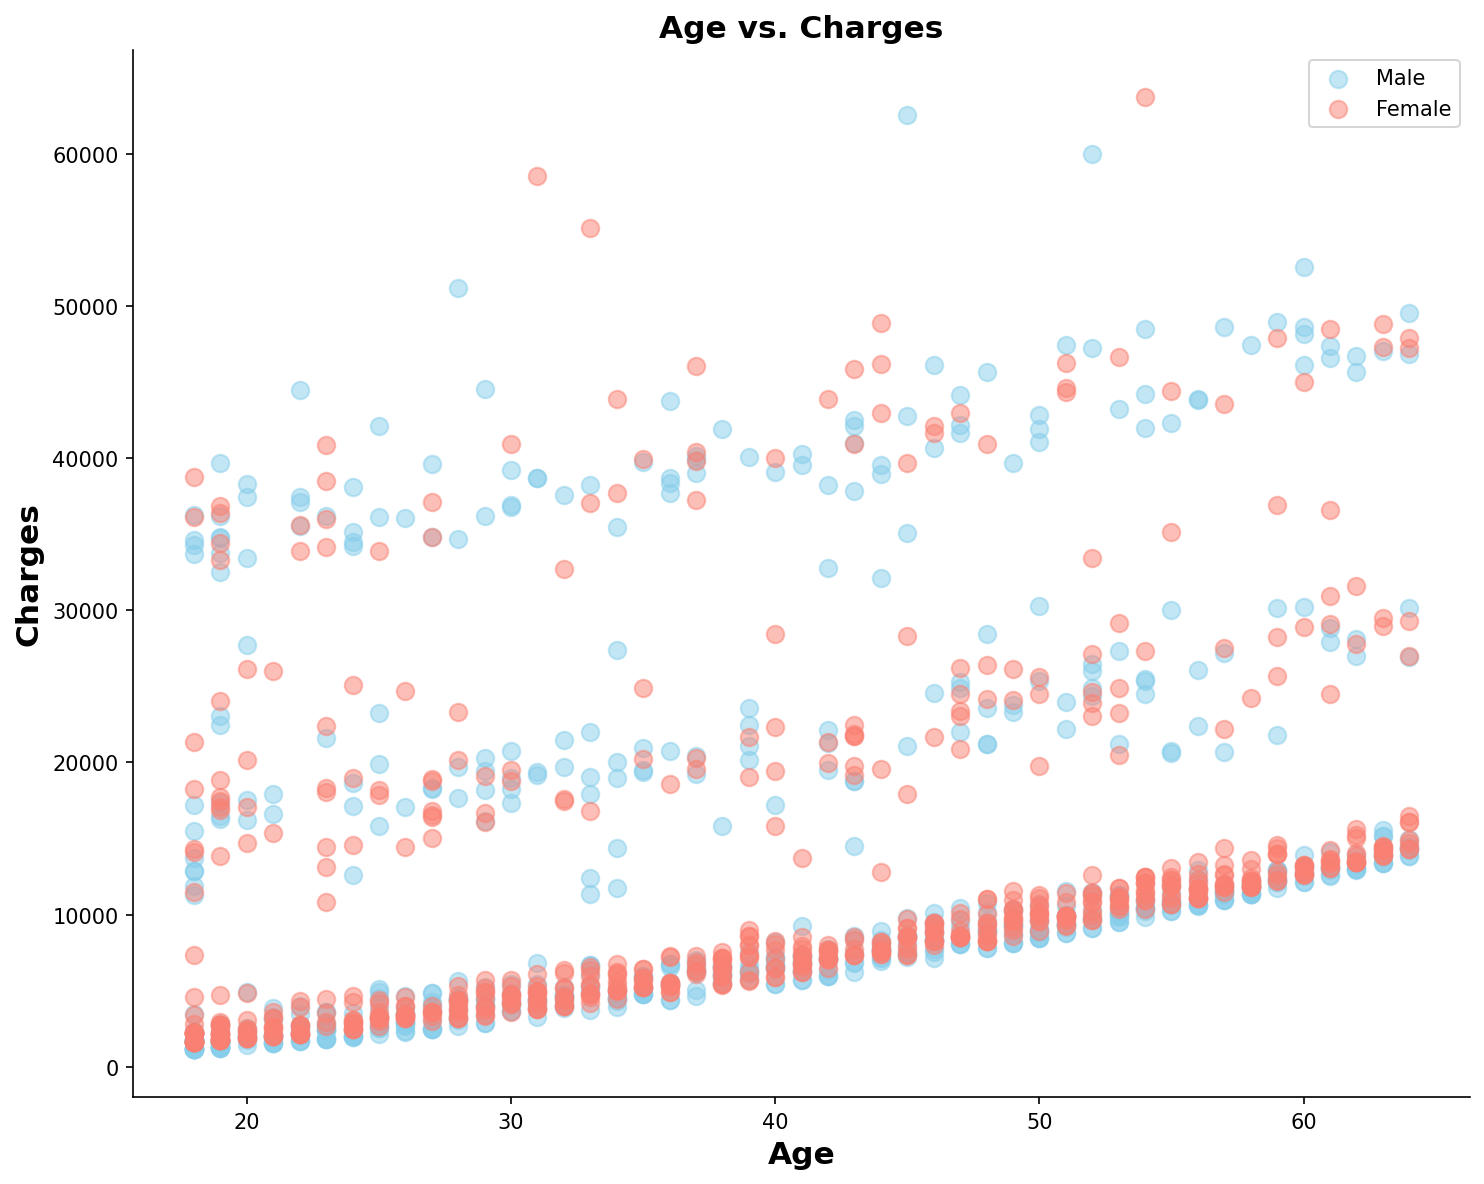

In [19]:
# Show the relationship between age and charges:

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi=150)
ax.scatter(x='age', y='charges',data=df[df['sex']=='male'], color='skyblue', alpha=0.5, label='Male', s=70)
ax.scatter(x='age', y='charges',data=df[df['sex']=='female'], color='salmon', alpha=0.5, label='Female', s=70)
ax.set_title('Age vs. Charges', fontsize=15, fontweight='bold')
ax.set_xlabel('Age', fontsize=15, fontweight='bold')
ax.set_ylabel('Charges', fontsize=15, fontweight='bold')

ax.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

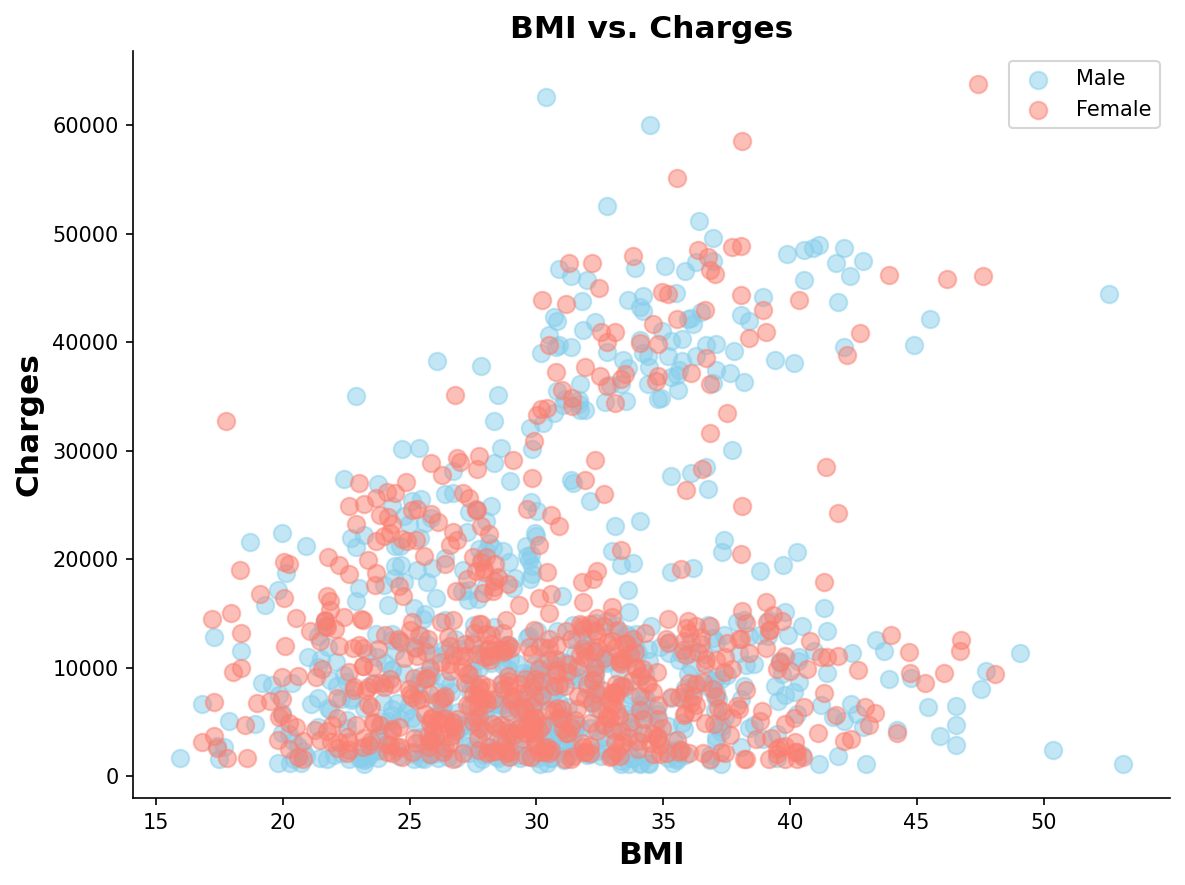

In [20]:
# Show the relationship between BMI and Charges

fig, ax = plt.subplots(1, 1, figsize = (8, 6), dpi=150)
ax.scatter(x='bmi', y='charges',data=df[df['sex']=='male'], color='skyblue', alpha=0.5, label='Male', s=70)
ax.scatter(x='bmi', y='charges',data=df[df['sex']=='female'], color='salmon', alpha=0.5, label='Female', s=70)
ax.set_title('BMI vs. Charges', fontsize=15, fontweight='bold')
ax.set_xlabel('BMI', fontsize=15, fontweight='bold')
ax.set_ylabel('Charges', fontsize=15, fontweight='bold')

ax.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

<ipython-input-89-f74eb4d6b730>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='sex', ylabel='charges'>

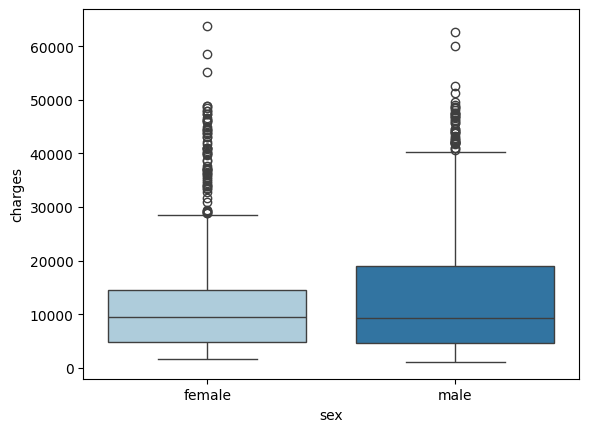

In [89]:
# Show the relationship between sex and charges:

sns.boxplot(data = df, x = 'sex', y = 'charges', palette = 'Paired')

<ipython-input-88-c24db6063d5a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='region', ylabel='charges'>

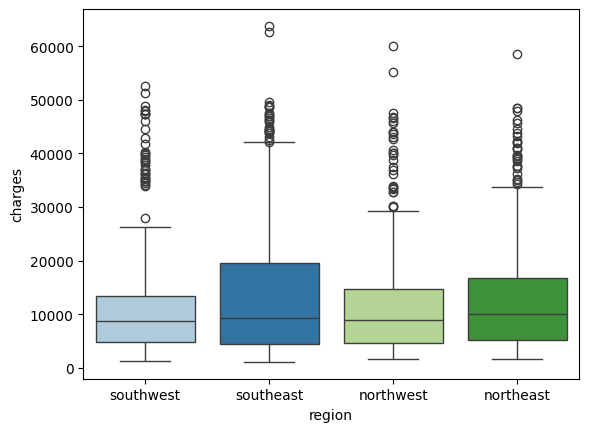

In [88]:
#Show the relationship between region and charges:

sns.boxplot(x='region', y='charges', data=df, palette = "Paired")

# The Southeast region has the highest amount of charges

<ipython-input-87-a76a444bf0a6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='children', ylabel='charges'>

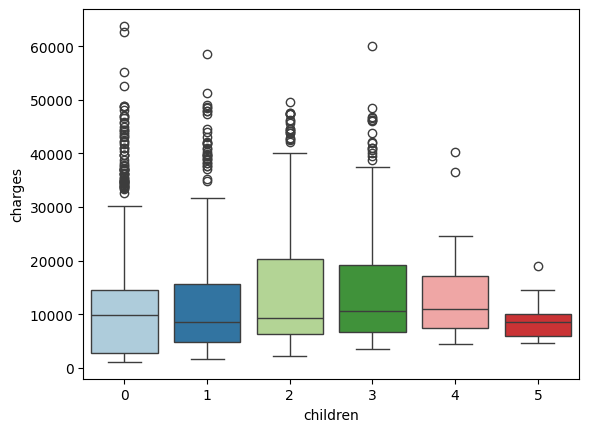

In [87]:
# Show the relationship between family size and charges:

sns.boxplot(data = df, x = 'children', y = 'charges', palette = 'Paired')

<ipython-input-96-d8c3de21993c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




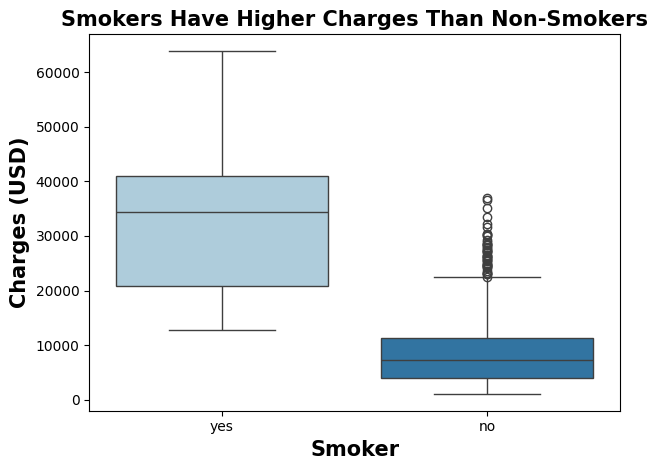

In [96]:
# Show the relationship between smoker and charges:

sns.boxplot(data = df, x = 'smoker', y = 'charges', palette = 'Paired')
plt.title('Smokers Have Higher Charges Than Non-Smokers', fontsize=15, fontweight='bold')
plt.xlabel('Smoker', fontsize=15, fontweight='bold')
plt.ylabel('Charges (USD)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

3. What is the percentage of smokers vs. non-smokers in the dataset?

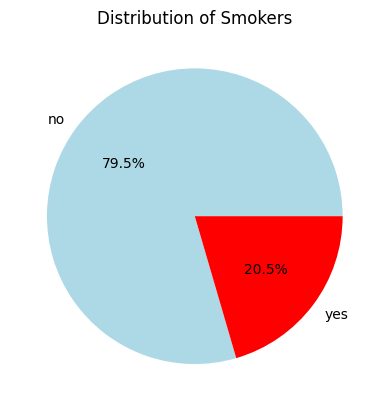

In [189]:
smoker_counts_1 = df['smoker'].value_counts()
plt.pie(smoker_counts_1, labels=smoker_counts_1.index, autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Distribution of Smokers')
plt.show()

4. Which attributes are seen in the top 75th percentile of charges incurred?

In [27]:
df['charges'].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [47]:
# Filter the DataFrame to show only rows where charges are in the 75th percentile:
high_charges_df = df[df['charges'].between(16639.91, 63770.43)]

high_charges_df.head(10)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


In [48]:
high_charges_df['smoker'].value_counts()

,count
smoker,
yes,255
no,80


In [49]:
high_charges_df['sex'].value_counts()

,count
sex,
male,188
female,147


In [50]:
high_charges_df['region'].value_counts()

,count
region,
southeast,112
northeast,82
northwest,74
southwest,67


In [51]:
high_charges_df['children'].value_counts()

,count
children,
0,129
1,80
2,72
3,46
4,7
5,1


In [52]:
high_charges_df['bmi'].describe()

,bmi
count,335.000000
mean,31.308582
std,5.843001
min,17.765000
25%,27.100000
50%,30.900000
75%,35.530000
max,52.580000


5. Which attributes are seen in the 25th percentile of charges incurred?

In [53]:
# Filter the DataFrame to show only rows where charges are in the 25th percentile:
low_charges_df = df[df['charges'].between(1121.87, 4740.29)]

low_charges_df.head(10)

,age,sex,bmi,children,smoker,region,charges
440,31,female,32.680,1,no,northwest,4738.26820
832,28,female,23.845,2,no,northwest,4719.73655
797,30,female,22.895,1,no,northeast,4719.52405
1220,30,female,21.945,1,no,northeast,4718.20355
32,19,female,28.600,5,no,southwest,4687.79700
454,32,male,46.530,2,no,southeast,4686.38870
934,32,male,37.180,2,no,southeast,4673.39220
1168,32,male,35.200,2,no,southwest,4670.64000
319,32,male,37.335,1,no,northeast,4667.60765
902,26,male,27.265,3,no,northeast,4661.28635


In [54]:
low_charges_df['smoker'].value_counts()

# There are no smokers within the 25th percentile of charges

,count
smoker,
no,335


In [55]:
low_charges_df['sex'].value_counts()

,count
sex,
male,175
female,160


In [56]:
low_charges_df['region'].value_counts()

,count
region,
southeast,97
northwest,83
southwest,80
northeast,75


In [57]:
low_charges_df['children'].value_counts()

,count
children,
0,204
1,75
2,38
3,15
4,2
5,1


In [58]:
low_charges_df['bmi'].describe()

,bmi
count,335.000000
mean,29.908687
std,6.242373
min,15.960000
25%,25.647500
50%,29.735000
75%,33.867500
max,53.130000


6. What is the correlation of all of the varibales with charges?

In [39]:
# Create a new datframe that you can change all the values to integers to create a heatmap

df2 = df.copy()
df2

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
22,18,male,34.100,0,no,southeast,1137.01100
663,18,male,33.660,0,no,southeast,1136.39940
1244,18,male,33.330,0,no,southeast,1135.94070
808,18,male,30.140,0,no,southeast,1131.50660


In [40]:
# Convert sex to an integer:

df2.replace({'sex':{'male':0,'female':1}},inplace=True)
df2.head()

<ipython-input-40-3a40fcf1c70c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'sex':{'male':0,'female':1}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
543,54,1,47.410,0,yes,southeast,63770.42801
1300,45,0,30.360,0,yes,southeast,62592.87309
1230,52,0,34.485,3,yes,northwest,60021.39897
577,31,1,38.095,1,yes,northeast,58571.07448
819,33,1,35.530,0,yes,northwest,55135.40209


In [41]:
# Convert smoker to an integer:

df2.replace({'smoker':{'no':0,'yes':1}},inplace=True)
df2.head()

<ipython-input-41-772c427c6c50>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'smoker':{'no':0,'yes':1}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
543,54,1,47.410,0,1,southeast,63770.42801
1300,45,0,30.360,0,1,southeast,62592.87309
1230,52,0,34.485,3,1,northwest,60021.39897
577,31,1,38.095,1,1,northeast,58571.07448
819,33,1,35.530,0,1,northwest,55135.40209


In [42]:
# Drop the region column:

df2.drop('region', axis=1, inplace=True)
df2.head()

,age,sex,bmi,children,smoker,charges
543,54,1,47.410,0,1,63770.42801
1300,45,0,30.360,0,1,62592.87309
1230,52,0,34.485,3,1,60021.39897
577,31,1,38.095,1,1,58571.07448
819,33,1,35.530,0,1,55135.40209


In [43]:
df2.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


In [45]:
px.imshow(df2.corr(),title='Correlation Heatmap')

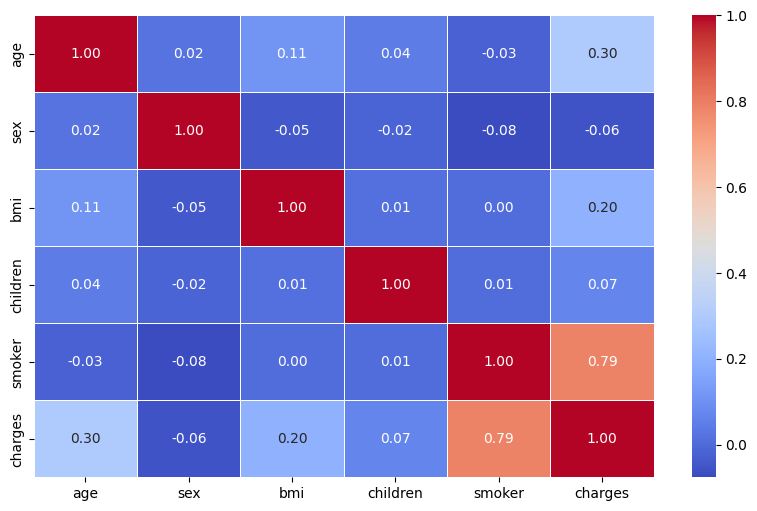

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.show()

# This heatmap shows that smoker has the highest correlation to charges

7. Categorize the different ages and BMIs in the dataset for further analysis:

In [66]:
#Categorize each age into 3 different age groups: young adults, middle aged individuals, and seniors

def classify_age_group(age):
    if age < 30:
        return 'Young Adult'
    elif 30 <= age <= 50:
        return 'Middle Aged'
    else:
        return 'Senior'

df['age_type'] = df['age'].apply(classify_age_group)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_type
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Middle Aged
4,32,male,28.880,0,no,northwest,3866.85520,Middle Aged


In [143]:
df['age_type'].value_counts()

,count
age_type,
Middle Aged,565
Young Adult,417
Senior,356


In [70]:
# Categorize BMI into 4 cateogires: underweight, normal weight, overweight, and obese:

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_type'] = df['bmi'].apply(classify_bmi)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_type,bmi_type
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Middle Aged,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Middle Aged,Overweight


In [142]:
df["bmi_type"].value_counts()

,count
bmi_type,
Obesity,722
Overweight,374
Normal weight,222
Underweight,20


8. What is the average charge for each BMI group?

In [72]:
avg_charges_by_bmi = df.groupby('bmi_type')['charges'].mean().sort_values(ascending = True)
avg_charges_by_bmi.head()

,charges
bmi_type,
Underweight,8852.200585
Normal weight,10379.499732
Overweight,11017.601623
Obese,15448.682869


<ipython-input-79-7d701ca7658c>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




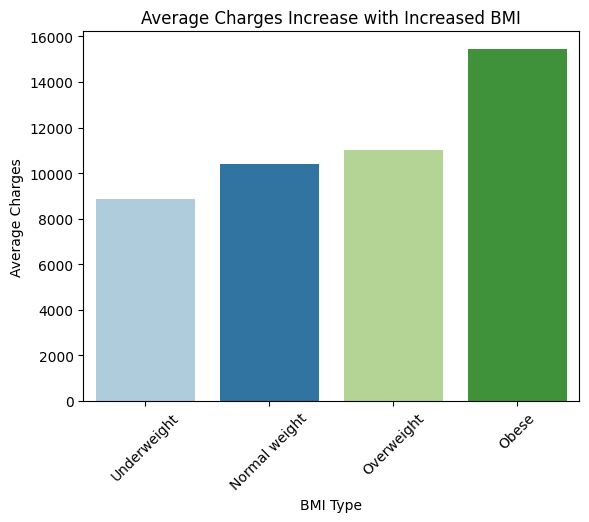

In [79]:
bars = sns.barplot(x=avg_charges_by_bmi.head(4).index, y=avg_charges_by_bmi.head(4).values, palette = "Paired")
plt.xticks(rotation=45)
plt.title("Average Charges Increase with Increased BMI")
plt.xlabel("BMI Type")
plt.ylabel("Average Charges")

plt.show()

9. What is the average charge for each region?

In [81]:
avg_charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending = True)
avg_charges_by_region.head()

,charges
region,
southwest,12346.937377
northwest,12417.575374
northeast,13406.384516
southeast,14735.411438


<ipython-input-82-97f85ab70c57>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




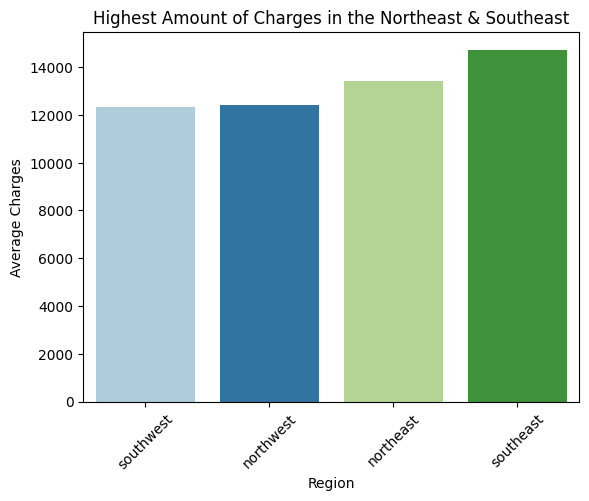

In [82]:
sns.barplot(x=avg_charges_by_region.head(4).index, y=avg_charges_by_region.head(4).values, palette = "Paired")
plt.xticks(rotation=45)
plt.title("Highest Amount of Charges in the Northeast & Southeast")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.show()

10. What is the average charge for each age group?

In [83]:
avg_charges_by_age = df.groupby('age_type')['charges'].mean().sort_values(ascending = True)
avg_charges_by_age.head()

,charges
age_type,
Young Adult,9182.487125
Middle Aged,13253.933466
Senior,18084.987223


<ipython-input-84-4eb4d2f19bef>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




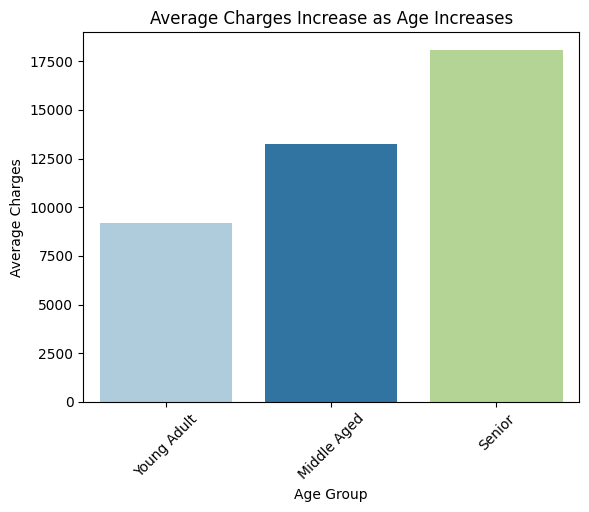

In [84]:
sns.barplot(x=avg_charges_by_age.head(3).index, y=avg_charges_by_age.head(3).values, palette = "Paired")
plt.xticks(rotation=45)
plt.title("Average Charges Increase as Age Increases")
plt.xlabel("Age Group")
plt.ylabel("Average Charges")
plt.show()

# Summary of Findings

This dataset can be used to examine the relationship between certain personal attributes and geographic factors and their impact on medical insurance charges. The specific personal attributes included in this dataset include: age, gender, BMI, family size, and smoking habits. The geographic factors included regions of the US: southwest, southeast, northwest, and northeast.

Through this exploratory data analysis, I focused on analyzing the relationship between each personal attribute and geographic location and the amount of health insurance charges incurred for that individual. The data shows that individuals who are smokers, obese, and senior incurred higher health insurance charges compared to individuals who are non-smokers, underweight or normal weight, and young adults or middle aged adults.  

# References: